<a href="https://colab.research.google.com/github/venky1602/DRUGS-/blob/main/Prediction_Model_Criteria_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decision Tree Algorithm – Complete Overview**
A Decision Tree is a supervised machine learning algorithm used for both classification and regression tasks. It models decisions in a tree-like structure, where each internal node represents a test on a feature, each branch represents an outcome of the test, and each leaf node represents a final decision or prediction.

In [ ]:
import pandas as pd

In [ ]:
#Taking sample data for Classify the diff types of criteria

df = pd.read_csv("/content/diabetes_prediction_dataset.csv")

df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
# Count Duplicate entry

df.duplicated().sum()

np.int64(3854)

In [ ]:
# dropping duplicates

df.drop_duplicates(keep = "last",inplace = True)

df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
df["gender"].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [ ]:
df["smoking_history"].unique()

array(['never', 'current', 'No Info', 'former', 'ever', 'not current'],
      dtype=object)

In [ ]:
# Convert to binary classification: Class 2 = positive (0), others = negative (1)

# To change the object into numbers based on ASCII value

from sklearn.preprocessing import LabelEncoder

code = LabelEncoder()

for i in df.columns:
  if df[i].dtype=="object":
    df[i]= code.fit_transform(df[i]) # Encoding

df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
5,0,20.0,0,0,4,27.32,6.6,85,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


**Encoding**

**Gender**

Female = 0,
Male = 1,
Other = 2

**smoking_history**

'never' = 4 , 'No Info' = 0 , 'current' = 1, 'former' = 3, 'ever' = 2, 'not current' = 5

In [ ]:
# Where independent = x , dependent = y

x = df.iloc[:,:-1] # x = defining independent columns with all the row
y = df.iloc[:,-1]  # y = defining dependent columns with all the row

In [ ]:
x.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level'],
      dtype='object')

In [ ]:
y.name

'diabetes'

In [ ]:
# Check the shape of x and y

x.shape, y.shape

((96146, 8), (96146,))

In [ ]:
# Count the diabetes

df["diabetes"].value_counts()

,count
diabetes,
0,87664
1,8482


In [ ]:
df.shape

(96146, 9)

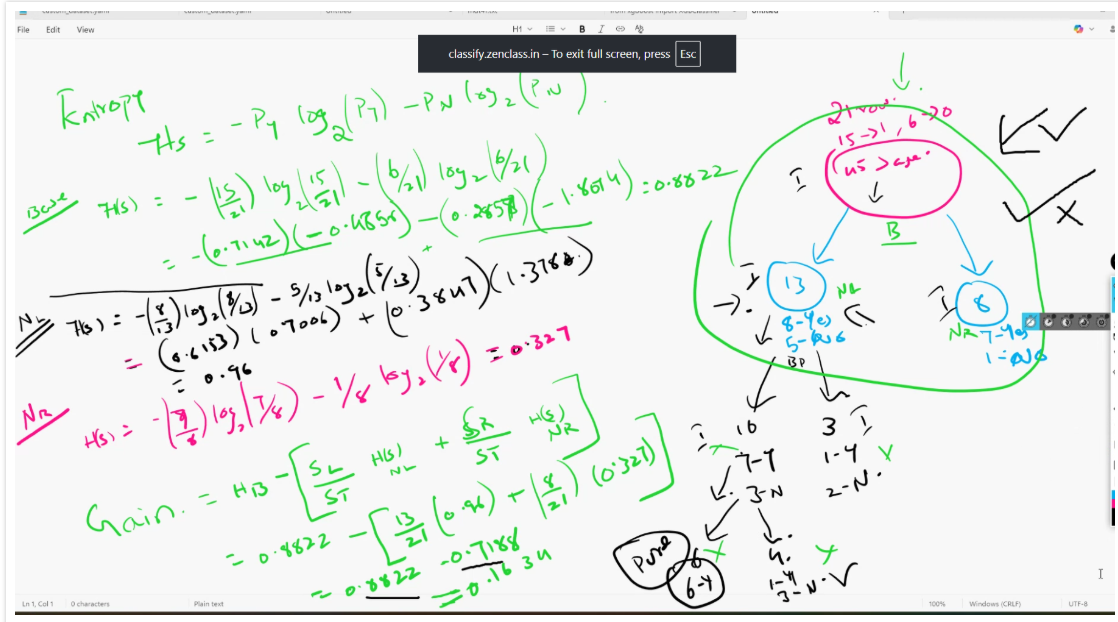

# **Gini Impurity**

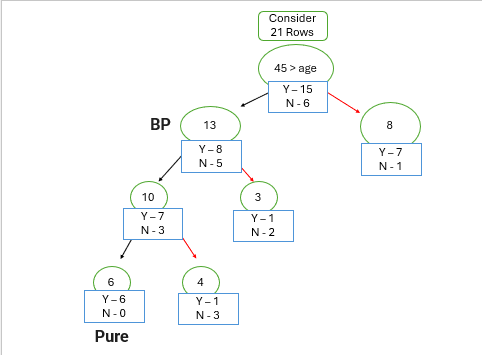

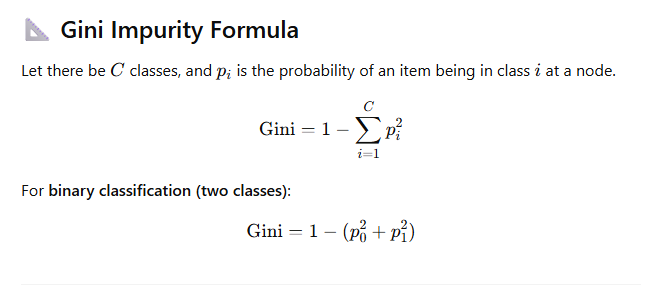

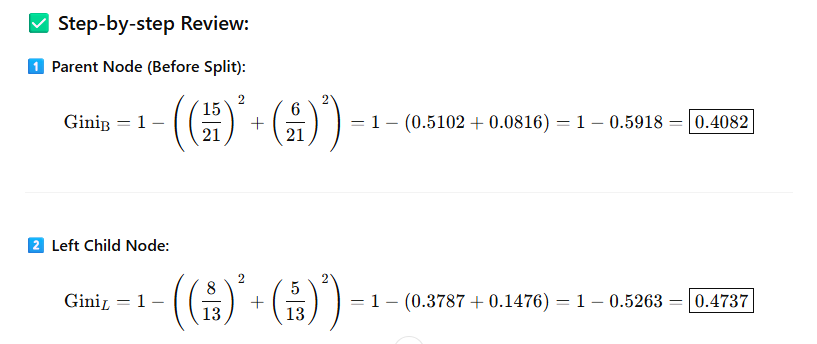

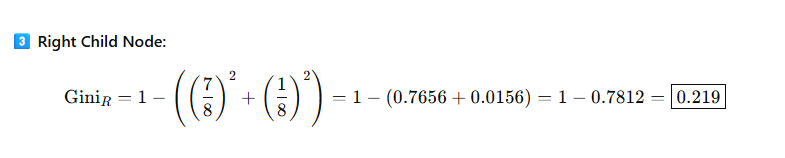

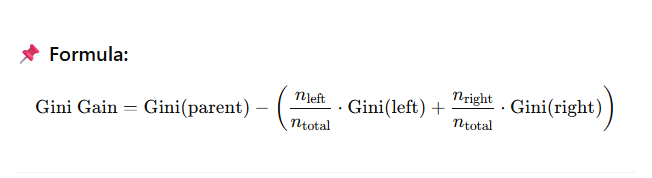

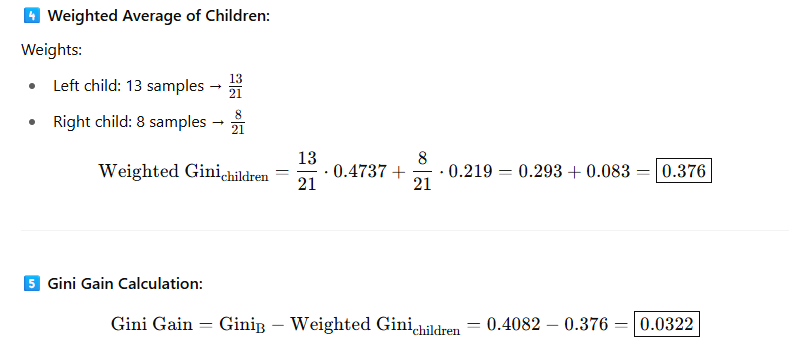

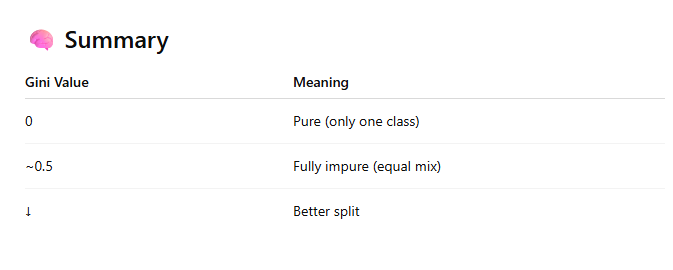

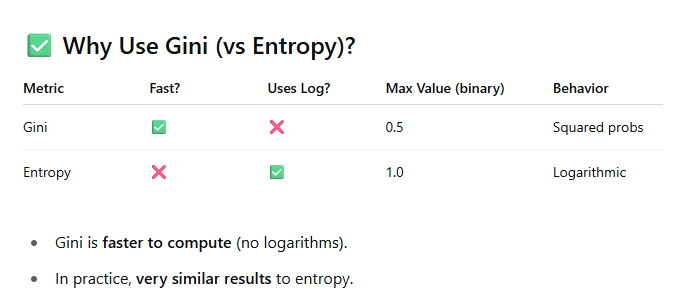

# **Machine Learning - DecisionTreeClassifier**

In [ ]:
# Split data

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.3)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((67302, 8), (28844, 8), (67302,), (28844,))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Gini
model_gini = DecisionTreeClassifier(criterion='gini').fit(x_train, y_train)
y_pred_gini = model_gini.predict(x_test)
print("Gini Classification Report:\n", classification_report(y_test, y_pred_gini))

# Entropy
model_entropy = DecisionTreeClassifier(criterion='entropy').fit(x_train, y_train)
y_pred_entropy = model_entropy.predict(x_test)
print("Entropy Classification Report:\n", classification_report(y_test, y_pred_entropy))

Gini Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     26234
           1       0.72      0.74      0.73      2610

    accuracy                           0.95     28844
   macro avg       0.85      0.86      0.85     28844
weighted avg       0.95      0.95      0.95     28844

Entropy Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     26234
           1       0.72      0.74      0.73      2610

    accuracy                           0.95     28844
   macro avg       0.84      0.86      0.85     28844
weighted avg       0.95      0.95      0.95     28844



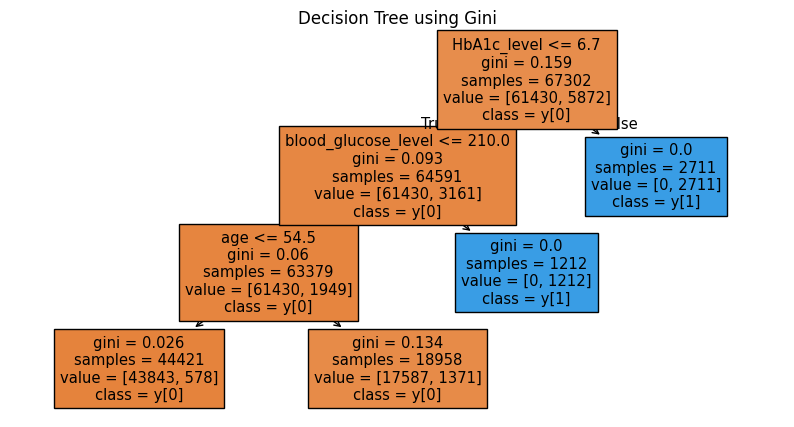

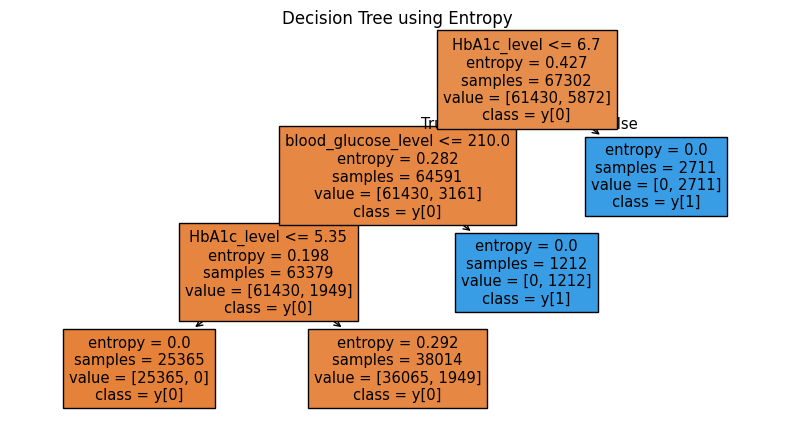

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

# Fit both models
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3)

clf_gini.fit(x_train, y_train)
clf_entropy.fit(x_train, y_train)

# Plot Gini Tree
plt.figure(figsize=(10, 5))
tree.plot_tree(clf_gini, filled=True, feature_names=x.columns, class_names=True)
plt.title("Decision Tree using Gini")
plt.show()

# Plot Entropy Tree
plt.figure(figsize=(10, 5))
tree.plot_tree(clf_entropy, filled=True, feature_names=x.columns, class_names=True)
plt.title("Decision Tree using Entropy")
plt.show()
